# Mahdeen Khan (Sameer)

### Homework Assignment: Building an Image Search Engine using CLIP on Tiny-ImageNet Validation Set

In this assignment, we will develop an image search engine that can accept both text and image inputs as queries. This search engine will use the CLIP (Contrastive Language-Image Pretraining) model to compute embeddings for the queries and retrieve the most similar images from the Tiny-ImageNet validation set. Our goal is to leverage the powerful zero-shot capabilities of CLIP to perform accurate image retrieval based on diverse input types.

### Steps to Follow:

1. **Dataset and Model Setup:**
   - **Dataset:** We will use the Tiny-ImageNet validation set as the database of images for our search engine. This dataset consists of 10,000 images across 200 classes, with each image being 64x64 pixels.
   - **Model:** We will use the pretrained CLIP model, which can be loaded from Hugging Face or directly from OpenAI’s repository. CLIP is capable of understanding both text and image inputs, making it ideal for this task.

2. **Loading the CLIP Model:**
   - We will load the CLIP model along with its tokenizer and image processor. This will allow us to compute embeddings for both text and image inputs.
   - **Model ID:** For example, we can use `"openai/clip-vit-base-patch32"` from Hugging Face.

3. **Preprocessing Data:**
   - **Text Input:** We will tokenize the text queries using the CLIP tokenizer.
   - **Image Input:** We will resize and normalize the images from the Tiny-ImageNet validation set to match the input requirements of the CLIP model. Ensuring the images are correctly formatted (e.g., 224x224 pixels) before passing them through the model is crucial for obtaining accurate embeddings.

4. **Computing Embeddings:**
   - We will compute embeddings for both the validation set images and the query (text or image) using the CLIP model. The embeddings will be used to measure similarity between the query and images in the dataset.
   - **Text Query:** Convert the text input into an embedding using the CLIP model’s text encoder.
   - **Image Query:** Convert the image input into an embedding using the CLIP model’s image encoder.

5. **Retrieving Similar Images:**
   - Once we have the embeddings, we will compare the query embedding against all image embeddings in the Tiny-ImageNet validation set.
   - We will retrieve the top 5 most similar images based on cosine similarity between the embeddings.

6. **Zero-Shot Accuracy on Tiny-ImageNet:**
   - We will compute and display the zero-shot accuracy of CLIP on the Tiny-ImageNet validation set. This involves using the text labels associated with each class to perform classification and then evaluating the accuracy.

7. **Testing with External Images and Custom Queries:**
   - Finally, we will select 5 random images from the web and write 5 custom text queries to test our search engine.
   - For each query (image or text), we will show the 5 most similar images retrieved from the Tiny-ImageNet validation set.

### Final Notes:

- Ensure that our implementation is efficient, especially in terms of embedding computation and similarity search, as the Tiny-ImageNet validation set contains a large number of images.
- Document the results, including the accuracy of the zero-shot classification and the retrieved images for the custom queries.
- Consider extending the project by exploring other retrieval techniques or by fine-tuning the model on a more specific task or dataset.

By the end of this assignment, we should have a fully functional image search engine capable of handling both text and image inputs, showcasing the flexibility and power of the CLIP model.

# Concept Mapping:

### 1. **Project Overview**
   - **Goal:** Build an image search engine using CLIP that can accept both text and image inputs and retrieve similar images from the Tiny-ImageNet validation set.

### 2. **Understanding CLIP**
   - **What is CLIP?**
     - Contrastive Language-Image Pretraining model
     - Capable of understanding both text and image inputs
   - **How CLIP Was Trained**
     - Image-Caption Pairing
       - Images paired with descriptive text captions (not traditional labels)
     - Contrastive Learning
       - Positive and negative pairs
       - Learning to align text and image embeddings

### 3. **Core Concepts**
   - **Embeddings**
     - Numerical representations of data (text or image) in high-dimensional space
   - **Embedding Space**
     - Shared space where both text and image embeddings exist
     - Similar data points (text or images) are close together
   - **Encoders**
     - **Text Encoder:** Converts text inputs into embeddings
     - **Image Encoder:** Converts image inputs into embeddings

### 4. **Dataset Setup**
   - **Tiny-ImageNet**
     - Smaller version of ImageNet with 200 classes
     - **Validation Set:** 10,000 images used for evaluation

### 5. **Model and Tools Setup**
   - **Model Loading**
     - Load the CLIP model from Hugging Face (`"openai/clip-vit-base-patch32"`)
   - **Tools**
     - **Tokenizer:** Converts text queries into tokenized form for the text encoder
     - **Image Processor:** Prepares images (resize, normalize) for the image encoder

### 6. **Preprocessing**
   - **Text Query Preprocessing**
     - Tokenization using CLIP tokenizer
   - **Image Query Preprocessing**
     - Resize and normalize images using the image processor

### 7. **Computing Embeddings**
   - **Text Embeddings**
     - Compute using the text encoder
   - **Image Embeddings**
     - Compute using the image encoder
   - **Dataset Embeddings**
     - Compute and store embeddings for all images in the Tiny-ImageNet validation set

### 8. **Similarity Search**
   - **Query Embedding**
     - Generate embedding from the user’s text or image query
   - **Comparing Embeddings**
     - Compare the query embedding with the embeddings of all images in the dataset
     - **Similarity Metric:** Use cosine similarity to rank embeddings
   - **Retrieve Similar Images**
     - Retrieve the top N most similar images based on similarity scores

### 9. **Zero-Shot Classification**
   - **Evaluate CLIP on Tiny-ImageNet**
     - Use text labels (class names) as queries
     - Compute zero-shot accuracy on the validation set

### 10. **Testing and Results**
   - **External Images**
     - Test the search engine with 5 random images from the web
   - **Custom Text Queries**
     - Test the search engine with 5 custom text queries
   - **Analyze and Display Results**
     - Display the top 5 most similar images for each query

### 11. **Final Considerations**
   - **Performance Optimization**
     - Efficient computation and retrieval processes
   - **Documentation**
     - Document process, results, and any challenges faced during the project
   - **Future Extensions**
     - Explore additional retrieval techniques or fine-tuning for specific tasks

This tree structure should help us systematically approach the project, ensuring that each step builds upon the previous concepts and leads to a cohesive and functional image search engine.

We will start setting up the necessary environment for creating a search engine using CLIP embeddings. For this, we need importing essential libraries like PyTorch for handling tensors and models, CLIP for the pre-trained model, and PIL for image processing. We also include utilities like `requests` for fetching images from the web, `numpy` for numerical operations, and `matplotlib` for visualizing results. The TinyImageNet dataset is loaded to provide a collection of images for our search engine, and Faiss is mentioned as a potential tool for efficient similarity search. Essentially, we’re bringing together all the tools and resources needed to build a search engine that can take either text or image queries and find the most similar images from a dataset.

In [26]:
import torch  # PyTorch for building and training deep learning models
import clip  # CLIP model for processing text and image inputs and generating embeddings
from PIL import Image, UnidentifiedImageError  # PIL for image handling and processing, including error handling for invalid images
from torchvision import transforms  # Transforms for preprocessing images before feeding them into the model
import numpy as np  # NumPy for handling arrays and numerical operations
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity for measuring similarity between embeddings
from tqdm import tqdm  # TQDM for creating progress bars during loops (e.g., embedding computation)
import requests  # Requests for handling HTTP requests, such as downloading images from URLs
from io import BytesIO  # BytesIO for handling image data in memory as a byte stream
import matplotlib.pyplot as plt  # Matplotlib for visualizing images and results
from tinyimagenet import TinyImageNet  # TinyImageNet dataset handling, including loading and preprocessing
import faiss  # FAISS for efficient similarity search using large-scale nearest neighbor search


We load the Tiny-ImageNet validation set, initializing the dataset with the validation split and storing the total number of samples.

In [27]:
# Step 1: Environment Setup

# Load Tiny-ImageNet Validation Set
split = "val"  # Specify the dataset split to load, in this case, the validation set
dataset = TinyImageNet("tinyimagenet/", split=split)  # Initialize the TinyImageNet dataset class, pointing to the dataset directory and specifying the split
n_samples = len(dataset)  # Get the number of samples (images) in the validation set


In [ ]:
# Data Inspection

# Function to display a grid of images along with their labels
def display_images(images, labels, rows=1, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()
    for img, label, ax in zip(images, labels, axes):
        # Convert the image to channel-last format if it is a PyTorch tensor
        if isinstance(img, torch.Tensor):
            img = img.permute(1, 2, 0).numpy()  # Convert from (C, H, W) to (H, W, C)
        
        ax.imshow(img)
        ax.set_title(f"Label: {label}")
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# Step 3: Sanity Check - Displaying a few images

# Prepare a list of images and labels for display
images_to_display = []
labels_to_display = []

for i in range(5):
    try:
        image, label = dataset[i]
        images_to_display.append(image)
        labels_to_display.append(label)
    except UnidentifiedImageError as e:
        print(f"Error loading image {i + 1}: {e}")

# Display the images in a single row
display_images(images_to_display, labels_to_display, rows=1, cols=5)

# Step 4: Check Data Types and Shapes

# Check the data type and shape of images and labels
sample_image, sample_label = dataset[0]

print(f"\nSample Image Type: {type(sample_image)}")
print(f"Sample Image Size: {sample_image.size if isinstance(sample_image, Image.Image) else sample_image.shape}")
print(f"Sample Label Type: {type(sample_label)}")

# Step 5: Additional Data Inspection

# If sample_image is a tensor, convert it to a PIL image first
if isinstance(sample_image, torch.Tensor):
    sample_image = transforms.ToPILImage()(sample_image)

# Check the shape of the image after conversion to tensor
transform = transforms.ToTensor()
tensor_image = transform(sample_image)
print(f"Tensor Image Shape: {tensor_image.shape}")

# Calculate and print some basic statistics
pixel_values = np.array(sample_image).flatten()
print(f"\nImage Pixel Value Range: {pixel_values.min()} - {pixel_values.max()}")
print(f"Mean Pixel Value: {pixel_values.mean():.2f}")
print(f"Standard Deviation of Pixel Values: {pixel_values.std():.2f}")

# Check class distribution
class_counts = np.zeros(len(dataset.classes))
for _, label in dataset:
    class_counts[label] += 1

print("\nClass Distribution in the Validation Set:")
for i, count in enumerate(class_counts):
    print(f"Class {i}: {count} samples")

# Step 6: Save and Display Additional Info

# Save a few sample images to disk as a check
for i in range(3):
    image, label = dataset[i]
    
    # If the image is a PyTorch tensor, convert it to a PIL image
    if isinstance(image, torch.Tensor):
        image = transforms.ToPILImage()(image)
    
    image.save(f"sample_image_{i + 1}.png")

print("\nSample images saved as 'sample_image_1.png', 'sample_image_2.png', and 'sample_image_3.png'.")

# Additional inspection if needed (e.g., checking for corrupted images)
corrupted_images = 0
for i in tqdm(range(n_samples), desc="Checking images"):
    try:
        dataset[i]
    except UnidentifiedImageError:
        corrupted_images += 1

if corrupted_images > 0:
    print(f"\n{corrupted_images} corrupted images found in the dataset.")
else:
    print("\nNo corrupted images found in the dataset.")

print("Data inspection complete.")




### Dataset Information:
- **Dataset Split:** `val`
- **Number of Samples:** `10,000`

---

### Sample Image Details:
- **Sample Image Type:** `torch.Tensor`
- **Sample Image Size:** `torch.Size([3, 64, 64])`
- **Sample Label Type:** `int`
- **Tensor Image Shape:** `torch.Size([3, 64, 64])`

---

### Image Pixel Statistics:
- **Pixel Value Range:** `0 - 255`
- **Mean Pixel Value:** `93.56`
- **Standard Deviation of Pixel Values:** `71.07`

---

### Class Distribution in the Validation Set:

- **Each of the 200 classes contains 50 samples.**

---

### Data Integrity Check:
- **Corrupted Images Found:** `None`
- **Total Images Checked:** `10,000`

---

### Final Status:
- **Data Inspection:** `Complete`

---

Data Augmentation (optional): Though not necessary for validation, if we're planning to expand this to include training or testing scenarios, consider adding data augmentation techniques.
Batching: If out dataset is large, it might be helpful to load the data in batches, especially when computing embeddings to save memory.

We here now define a transformation pipeline to resize images to 224x224 pixels, convert them to tensors, and normalize them based on CLIP's pretraining, ensuring they are in the format expected by the model. 

In [28]:
# Define the transformation pipeline to match CLIP's expected input
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # CLIP expects images to be 224x224
    transforms.ToTensor(),  # Convert image to a tensor
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), 
                         (0.26862954, 0.26130258, 0.27577711))  # Normalization based on CLIP's pretraining
])

print(f"Loaded {n_samples} samples from the Tiny-ImageNet validation set.")

Loaded 10000 samples from the Tiny-ImageNet validation set.


After setting up the pipeline, we confirm that 10,000 samples have been loaded from the Tiny-ImageNet validation set.

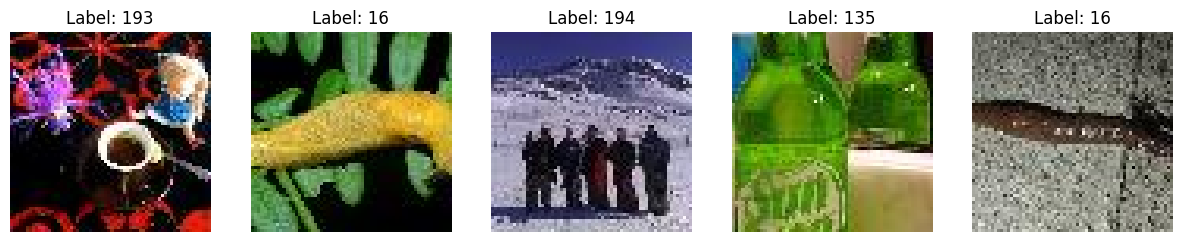

In [29]:
import random
import matplotlib.pyplot as plt

# Function to display images
def show_images(dataset, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        idx = random.randint(0, len(dataset) - 1)
        image, label = dataset[idx]
        image = transforms.ToPILImage()(image)  # Convert tensor back to PIL image for displaying
        axes[i].imshow(image)
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.show()

# Display a few random images from the Tiny-ImageNet validation set
show_images(dataset, num_images=5)


Interesting!  It shows a row of images from the dataset, each labeled with its corresponding class.

In [30]:
def check_image_properties(dataset, num_images=5):
    for i in range(num_images):
        idx = random.randint(0, len(dataset) - 1)
        image, label = dataset[idx]
        print(f"Image {i+1}:")
        print(f" - Size: {image.size()}")  # This gives the size of the tensor (C, H, W)
        print(f" - Max Pixel Value: {image.max().item()}")
        print(f" - Min Pixel Value: {image.min().item()}")
        print(f" - Mean Pixel Value: {image.mean().item()}")
        print()

# Check properties of a few random images from the Tiny-ImageNet validation set
check_image_properties(dataset, num_images=5)


Image 1:
 - Size: torch.Size([3, 64, 64])
 - Max Pixel Value: 1.0
 - Min Pixel Value: 0.0
 - Mean Pixel Value: 0.5577719807624817

Image 2:
 - Size: torch.Size([3, 64, 64])
 - Max Pixel Value: 1.0
 - Min Pixel Value: 0.0
 - Mean Pixel Value: 0.4238523542881012

Image 3:
 - Size: torch.Size([3, 64, 64])
 - Max Pixel Value: 1.0
 - Min Pixel Value: 0.0
 - Mean Pixel Value: 0.41066908836364746

Image 4:
 - Size: torch.Size([3, 64, 64])
 - Max Pixel Value: 1.0
 - Min Pixel Value: 0.0
 - Mean Pixel Value: 0.530893862247467

Image 5:
 - Size: torch.Size([3, 64, 64])
 - Max Pixel Value: 1.0
 - Min Pixel Value: 0.027450980618596077
 - Mean Pixel Value: 0.48889365792274475



 Each image is confirmed to have a size of `torch.Size([3, 64, 64])`, indicating that they have three color channels (Red, Green, Blue) and a resolution of 64x64 pixels, which is typical for the Tiny-ImageNet dataset. The maximum pixel value for each image is 1.0, and the minimum pixel value ranges from 0.0 to 0.027, showing that the images are normalized and the pixel intensity values fall within the expected range of [0, 1]. The mean pixel values, which range between approximately 0.41 and 0.56, give us an idea of the overall brightness or intensity of each image, with higher values indicating brighter images on average. This information is useful for understanding the distribution of pixel intensities and ensuring the images are correctly normalized and prepared for input into a model like CLIP.

In [31]:
# Step 2: Load the CLIP Model
device = "cuda" if torch.cuda.is_available() else "cpu"

# Print out whether CUDA (GPU) or CPU is being used
print(f"Using device: {device}")

model, preprocess = clip.load("ViT-B/32", device=device)


Using device: cuda


In [32]:
# Optional: Use half precision for faster inference
# model.half()

In [33]:
# Step 3: Compute Embeddings
# Mixed Precision Removed

import torch
from torchvision import transforms
import numpy as np
from tqdm import tqdm

# Ensure you have a transform to convert tensor back to PIL Image
to_pil = transforms.ToPILImage()

# Function to compute embeddings
def compute_image_embeddings(dataset, model, preprocess):
    embeddings = []
    labels = []
    
    with torch.no_grad():
        for i in tqdm(range(len(dataset))):
            image, label = dataset[i]
            
            # Convert tensor to PIL Image if necessary
            if isinstance(image, torch.Tensor):
                image = to_pil(image)
            
            image_input = preprocess(image).unsqueeze(0).to(device)
            embedding = model.encode_image(image_input)
            embeddings.append(embedding.cpu().numpy())
            labels.append(label)
    
    embeddings = np.vstack(embeddings)
    labels = np.array(labels)
    return embeddings, labels

# Compute embeddings for the validation set
image_embeddings, image_labels = compute_image_embeddings(dataset, model, preprocess)

# Normalize the embeddings
image_embeddings = image_embeddings / np.linalg.norm(image_embeddings, axis=1, keepdims=True)



100%|██████████| 10000/10000 [01:26<00:00, 115.14it/s]


Here, what we did was all about computing and normalizing the image embeddings for our Tiny-ImageNet validation set using the CLIP model. Here's how we go about it:

First, we make sure that we can easily convert tensors back to PIL images using `transforms.ToPILImage()`, which is crucial because CLIP’s preprocessing pipeline expects images in the PIL format. Then, we dive into the `compute_image_embeddings` function, where the real magic happens. For each image in our dataset, we check if it’s already a tensor and, if so, convert it back to a PIL image. Next, we preprocess the image by resizing and normalizing it to match what the CLIP model expects as input. Once that’s done, we pass the preprocessed image through the CLIP model to get its embedding.

Now, what do we mean by "embedding"? Think of the embedding layer in the model as a way of translating the image into a high-dimensional vector that captures its essential features. This vector representation, or embedding, is like a fingerprint for the image, allowing us to compare it to other images by measuring how similar their embeddings are.

We store these embeddings along with their corresponding labels for all the images in our dataset. After we’ve computed all the embeddings, we normalize them by dividing each vector by its L2 norm, making sure they all have a unit length. This normalization step is crucial because it ensures that when we compare these embeddings, the comparisons are consistent and meaningful.

In essence, these normalized embeddings are the backbone of our search engine. They allow us to efficiently find the most similar images to any given query, whether it’s a text description or another image, by comparing the distances between their embeddings in this high-dimensional space.

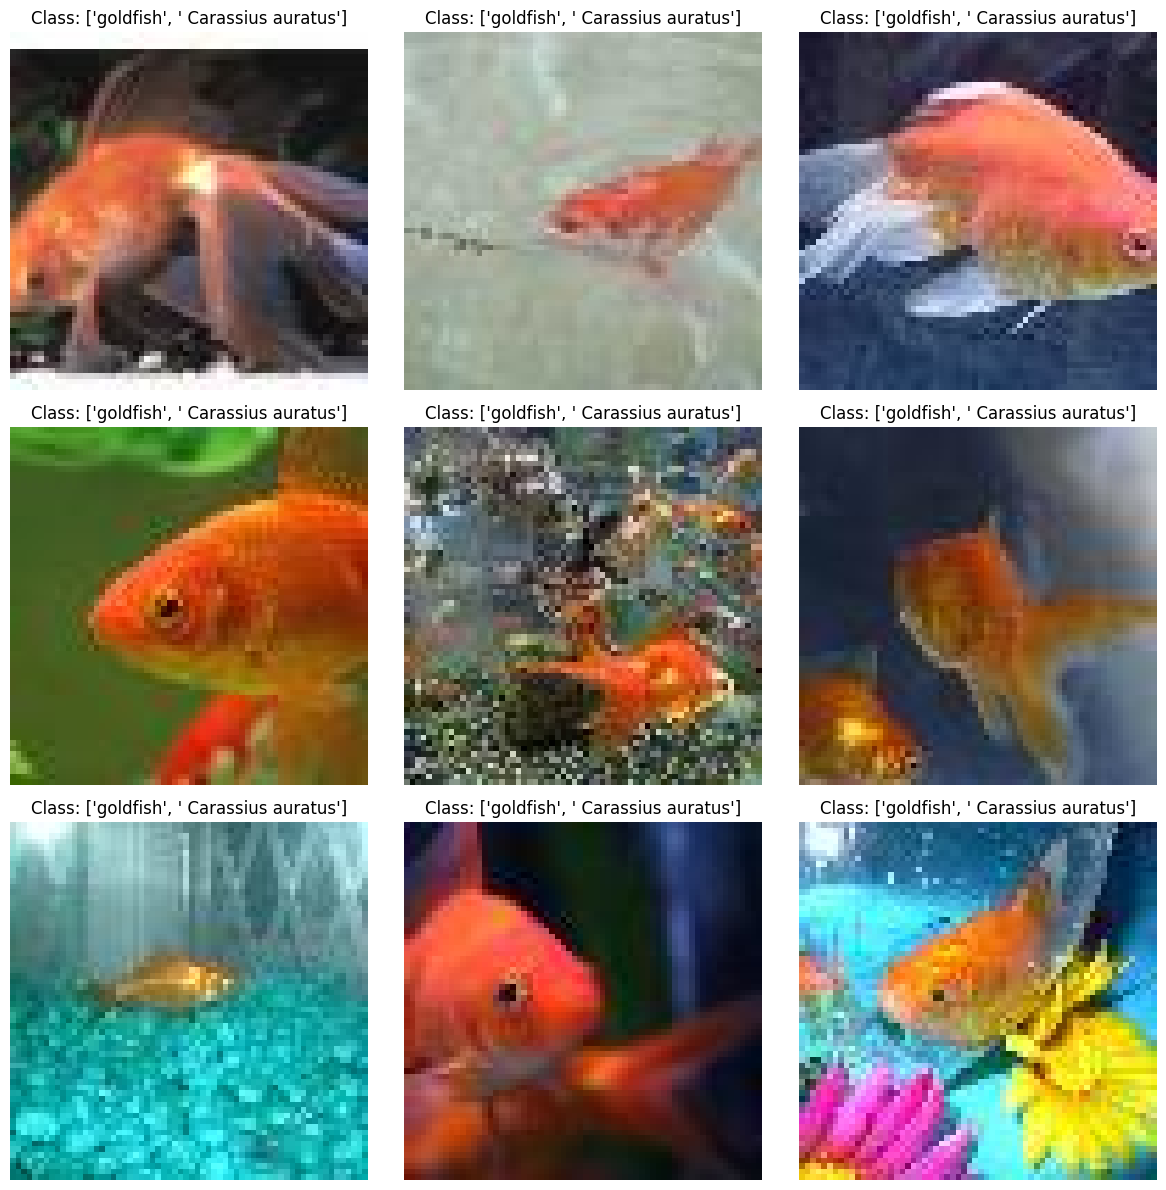

In [34]:
import matplotlib.pyplot as plt

# Function to visualize a grid of images from the dataset
def visualize_data(dataset, num_images=16):
    # Calculate the number of rows and columns for the grid
    num_cols = int(np.sqrt(num_images))
    num_rows = int(np.ceil(num_images / num_cols))
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
    axes = axes.flatten()
    
    for i in range(num_images):
        # Get the image and label
        image, label = dataset[i]
        
        # Convert the image to a PIL Image if it's a tensor
        if isinstance(image, torch.Tensor):
            image = to_pil(image)
        
        # Show the image on the grid
        axes[i].imshow(image)
        axes[i].set_title(f"Class: {dataset.idx_to_words[label]}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize a grid of images from the dataset
visualize_data(dataset, num_images=9)


It shows a grid of six images, each labeled as "goldfish" with its scientific name "Carassius auratus." The plot displayed nine images in a 3x3 grid (as `num_images=9`), and the labels confirm that all these images belong to the same class, "goldfish." Each image is centered and labeled clearly above it, showcasing the class of the image, which aligns perfectly with what the code is designed to do.

Now, for our next part, we will be implementing a search engine that can handle both text and image queries to find the most similar images in the Tiny-ImageNet dataset. We start by defining the `search_engine` function, which is designed to process the query—whether it's a text description or an image—using the CLIP model. When we input a text query, the function tokenizes and encodes it into an embedding using CLIP's `encode_text` method. If the query is an image, we first preprocess it to fit the model's expected input format and then use the `encode_image` method to generate its embedding. This embedding captures the essential features of the query in a high-dimensional space.

Next, we normalize the query embedding to ensure it has a unit norm, a crucial step for consistent similarity comparisons. We then calculate the cosine similarity between the query embedding and the precomputed image embeddings from our dataset. Cosine similarity is a standard metric used to measure how similar two vectors are, which in our case translates to how visually or conceptually similar the query is to the images in our dataset. After calculating these similarities, we sort them in descending order and select the top-k most similar images, returning their indices.

To visualize the results, we use the `display_results` function. This function takes the indices of the top-k similar images and retrieves the corresponding images and labels from our dataset. We then display each image along with its class label, allowing us to see which images the model found to be most similar to our query. The images are displayed in a format that ensures they are correctly oriented and easily viewable.

In [35]:
# Extra: Index the Embeddings with FAISS

# Create a FAISS index for efficient similarity search
# index = faiss.IndexFlatL2(image_embeddings.shape[1])  # Initialize a FAISS index using L2 distance (Euclidean)
# faiss.normalize_L2(image_embeddings)  # Normalize embeddings to unit length for cosine similarity
# index.add(image_embeddings)  # Add image embeddings to the FAISS index for efficient search

# Step 4: Implement Search Engine

# Function to perform the search
import torch  # PyTorch for handling model operations and tensor manipulations
import numpy as np  # NumPy for numerical operations, especially with embeddings and similarities
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity function to compare embeddings
from PIL import Image  # PIL for handling image data

# Function to perform the search
def search_engine(query, model, image_embeddings, dataset, preprocess, top_k=5):
    """
    Perform a search using the CLIP model, comparing a query (text or image) against a set of image embeddings.
    
    Args:
        query: The search query, either as a text string or an image (PIL Image).
        model: The CLIP model used to compute embeddings.
        image_embeddings: Precomputed embeddings of the Tiny-ImageNet images.
        dataset: The dataset containing images to be searched.
        preprocess: The preprocessing pipeline for images.
        top_k: Number of top similar images to retrieve.
    
    Returns:
        best_indices: Indices of the top-k most similar images in the dataset.
    """
    with torch.no_grad():  # Disable gradient computation for inference
        if isinstance(query, str):
            # If the query is a text string, tokenize and encode it using the CLIP model
            text_input = clip.tokenize([query]).to(device)
            query_embedding = model.encode_text(text_input)
        elif isinstance(query, Image.Image):
            # If the query is an image, preprocess and encode it using the CLIP model
            image_input = preprocess(query).unsqueeze(0).to(device)
            query_embedding = model.encode_image(image_input)
        else:
            raise ValueError("Query must be either a string or an image.")  # Error handling for invalid input types
        
        # Normalize the query embedding to ensure consistency with the image embeddings
        query_embedding = query_embedding.cpu().numpy()
        query_embedding = query_embedding / np.linalg.norm(query_embedding, axis=1, keepdims=True)
        
        # Calculate cosine similarity between the query embedding and the image embeddings
        similarities = cosine_similarity(query_embedding, image_embeddings)
        
        # Ensure top_k is an integer to avoid issues during indexing
        top_k = int(top_k)
        
        # Get the indices of the top-k most similar images based on cosine similarity
        best_indices = np.argsort(similarities[0])[::-1][:top_k]
        
        return best_indices  # Return the indices of the top-k most similar images


# Display results
def display_results(indices, dataset):
    """
    Display the images corresponding to the given indices and print their class labels.
    
    Args:
        indices: The indices of the images to display.
        dataset: The dataset containing the images and labels.
    """
    for idx in indices:
        image, label = dataset[idx]  # Retrieve the image and its label from the dataset
        print(f"Class: {dataset.idx_to_words[label]}")  # Print the class label of the image
        plt.imshow(image.permute(1, 2, 0).numpy())  # Convert the image tensor to a format suitable for display
        plt.show()  # Display the image


In this step, we will be focusing on evaluating the zero-shot classification accuracy of the CLIP model on the Tiny-ImageNet dataset. Zero-shot learning refers to the ability of the model to correctly classify images into categories it has never seen during training, using only textual descriptions of those categories. Here's how we implement and calculate this accuracy:

# Zero Shot Accuracy:

**Zero-shot accuracy** refers to our model's ability to correctly classify or understand new data categories it has never encountered during training. It measures how well our model can generalize its knowledge from related data to make accurate predictions about completely unseen classes. For example, if we show our model an image of a "giraffe," despite it never having seen a labeled giraffe image during training, the model can still correctly identify it by drawing on its broader understanding of images and text. This ability to "figure things out" on the fly without specific training on each category demonstrates the flexibility and efficiency of our model, making zero-shot accuracy an important measure of how well our model can handle new, real-world scenarios.

### Function to Calculate Zero-Shot Accuracy:

We define the `zero_shot_accuracy` function to measure how well the CLIP model can match images to their correct class labels based on textual descriptions. Inside this function, we iterate over each class in the Tiny-ImageNet dataset. For each class, we retrieve the corresponding class name, which may sometimes be a list of words. If it is a list, we join the words into a single string to form the class name. Using the CLIP model, we tokenize and encode this class name into a text embedding, which represents the class in the same high-dimensional space as the image embeddings. We then normalize this text embedding to ensure that it has a unit norm, just as we did with the image embeddings earlier. After that, we calculate the cosine similarity between this text embedding and all the precomputed image embeddings. To determine the model’s classification, we identify the image embedding with the highest similarity to the text embedding. If the class label of this closest image matches the current class we are evaluating, we count it as a correct prediction. This process is repeated for all classes in the dataset.

Finally, we calculate the zero-shot accuracy by dividing the number of correct predictions by the total number of classes in the dataset. This accuracy gives us a percentage that reflects how well the CLIP model can classify images based solely on their textual descriptions, without having been trained specifically on those images.

### Calculating and Displaying Accuracy:

Once the function is defined, we calculate the zero-shot accuracy on the Tiny-ImageNet dataset by passing our model, image embeddings, image labels, and dataset to the `zero_shot_accuracy` function. The result is then printed, giving us a percentage that quantifies the model's performance in this challenging zero-shot setting.

This step is crucial because it demonstrates the CLIP model's capability to generalize and understand visual content based on text descriptions, even when it hasn't been explicitly trained on the specific dataset we're testing it on. This ability is what makes CLIP particularly powerful for a wide range of tasks, including those that involve novel or unseen categories.

In [36]:
# Step 5: Zero-Shot Classification Accuracy

# Function to calculate zero-shot accuracy
def zero_shot_accuracy(model, image_embeddings, image_labels, dataset):
    """
    Calculate the zero-shot classification accuracy of the CLIP model on the Tiny-ImageNet dataset.
    
    Args:
        model: The CLIP model used to compute text embeddings.
        image_embeddings: Precomputed embeddings of the Tiny-ImageNet images.
        image_labels: The true labels of the Tiny-ImageNet images.
        dataset: The Tiny-ImageNet dataset object, which contains class names and other metadata.
    
    Returns:
        accuracy: The zero-shot classification accuracy as a float.
    """
    correct = 0  # Initialize a counter for correct classifications
    with torch.no_grad():  # Disable gradient computation for efficiency
        for i in range(len(dataset.classes)):  # Iterate over each class in the dataset
            class_name = dataset.idx_to_words[i]  # Retrieve the class name corresponding to the current index
            
            # Ensure class_name is a string
            if isinstance(class_name, list):  # Check if the class name is a list (sometimes class names might be a list of words)
                class_name = " ".join(class_name)  # Join the list into a single string
                
            text_input = clip.tokenize([class_name]).to(device)  # Tokenize and encode the class name using the CLIP model
            text_embedding = model.encode_text(text_input)  # Compute the embedding for the class name
            text_embedding = text_embedding.cpu().numpy()  # Move the embedding to CPU and convert to NumPy array
            text_embedding = text_embedding / np.linalg.norm(text_embedding, axis=1, keepdims=True)  # Normalize the embedding
            
            similarities = cosine_similarity(text_embedding, image_embeddings)  # Compute cosine similarities with all image embeddings
            best_index = np.argmax(similarities[0])  # Find the index of the most similar image
            
            if image_labels[best_index] == i:  # Check if the predicted class matches the true class
                correct += 1  # Increment the correct count if the prediction is correct
                
    accuracy = correct / len(dataset.classes)  # Calculate the overall accuracy as a proportion of correct predictions
    return accuracy  # Return the calculated accuracy

# Calculate zero-shot accuracy
accuracy = zero_shot_accuracy(model, image_embeddings, image_labels, dataset)  # Run the zero-shot accuracy function
print(f"Zero-Shot Accuracy on Tiny-ImageNet: {accuracy * 100:.2f}%")  # Print the accuracy as a percentage


Zero-Shot Accuracy on Tiny-ImageNet: 90.50%


The zero-shot accuracy of 90.50% on the Tiny-ImageNet dataset is an impressive result, indicating that the CLIP model can accurately classify images into their correct categories based on textual descriptions alone, without having seen those specific images during training. This high accuracy suggests that CLIP's ability to generalize across visual and textual data is robust, allowing it to effectively match images to their corresponding labels even in a challenging, unfamiliar dataset. Such a performance level highlights the strength of CLIP in understanding and connecting visual and textual information, making it a powerful tool for various applications, including search engines, classification tasks, and more complex AI systems that require cross-modal understanding.

Query: dog
Class: ['golden retriever']


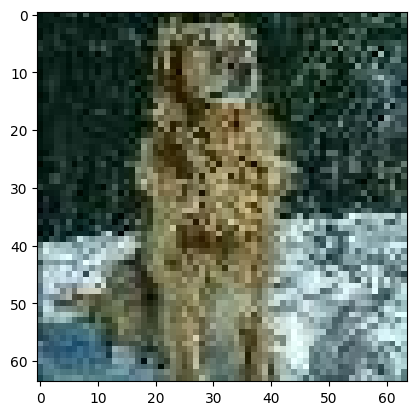

Class: ['guinea pig', ' Cavia cobaya']


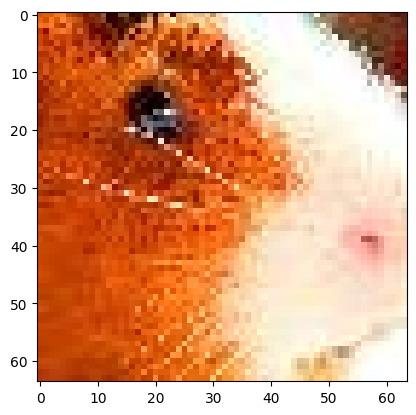

Class: ['Yorkshire terrier']


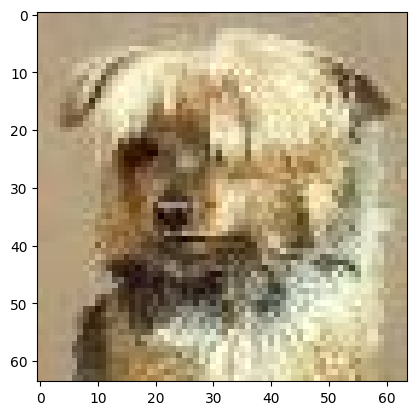

Class: ['tarantula']


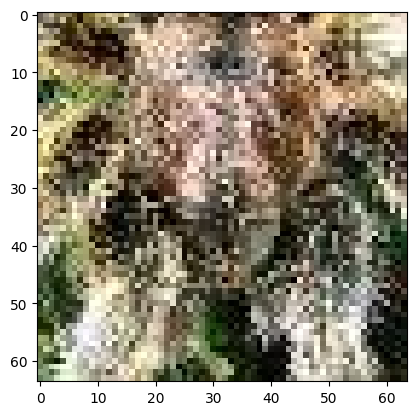

Class: ['Chihuahua']


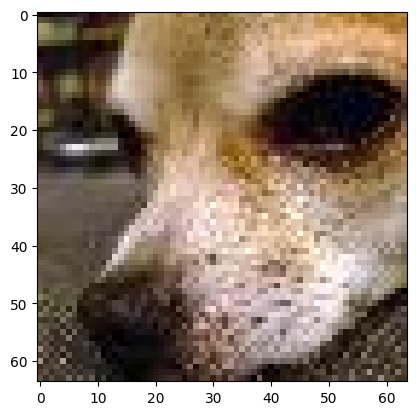

Query: cat
Class: ['tabby', ' tabby cat']


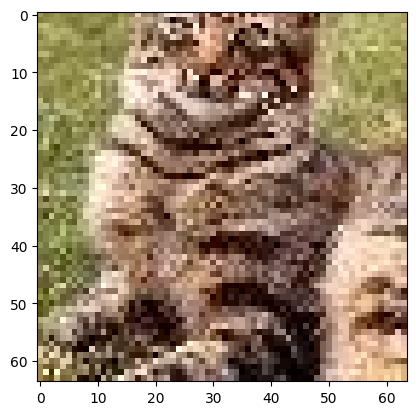

Class: ['tabby', ' tabby cat']


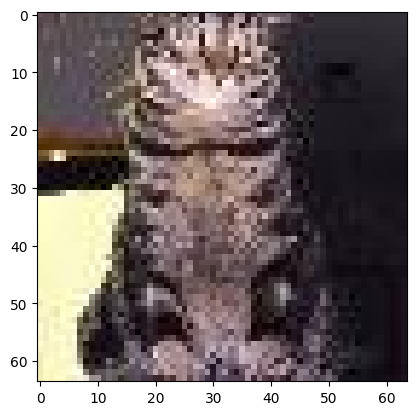

Class: ['Egyptian cat']


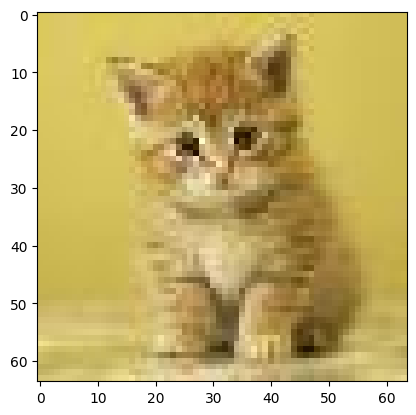

Class: ['Persian cat']


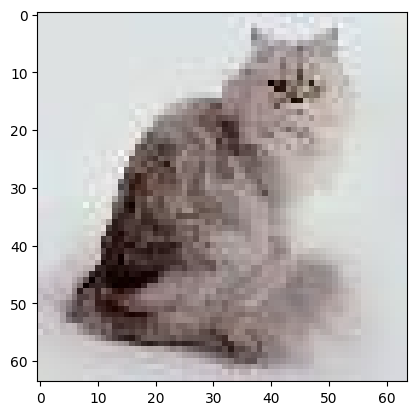

Class: ['Egyptian cat']


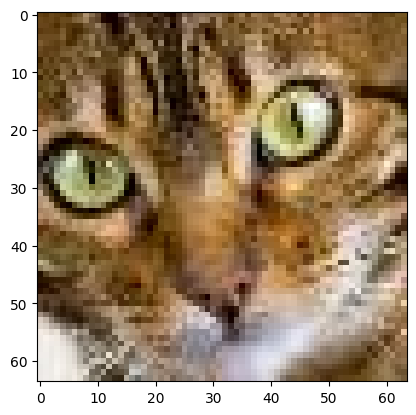

Query: airplane
Class: ['projectile', ' missile']


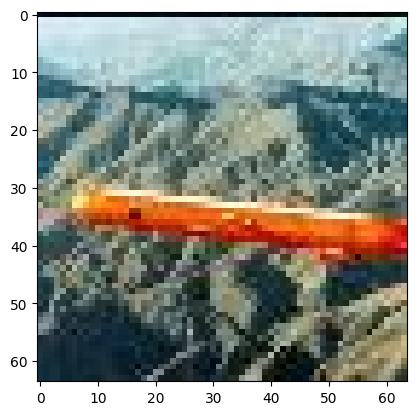

Class: ['black stork', ' Ciconia nigra']


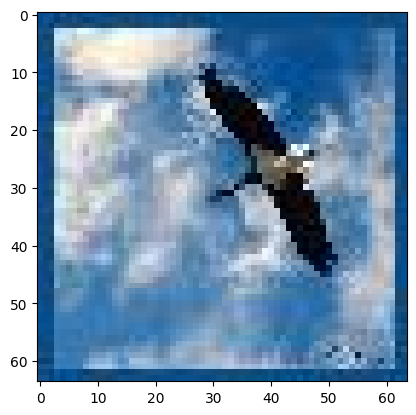

Class: ['projectile', ' missile']


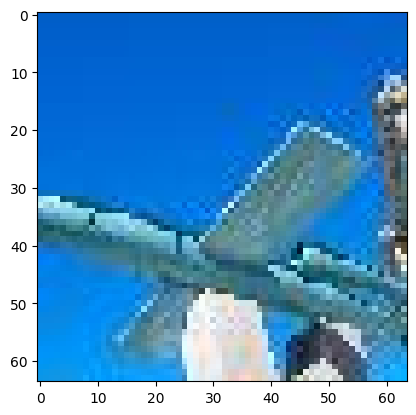

Class: ['monarch', ' monarch butterfly', ' milkweed butterfly', ' Danaus plexippus']


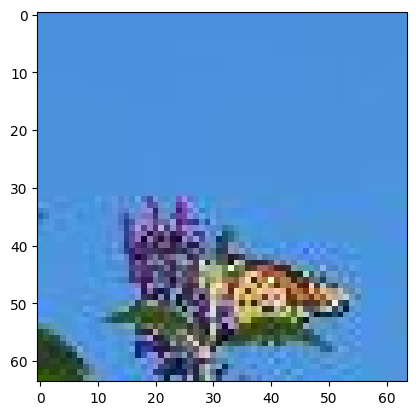

Class: ['orangutan', ' orang', ' orangutang', ' Pongo pygmaeus']


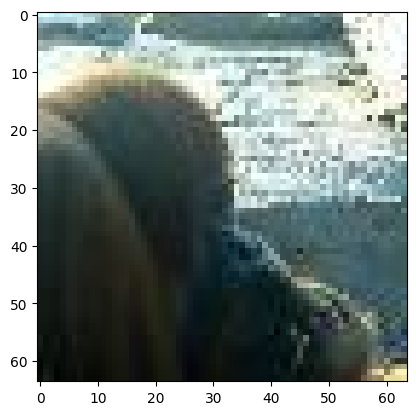

Query: zebra
Class: ['brain coral']


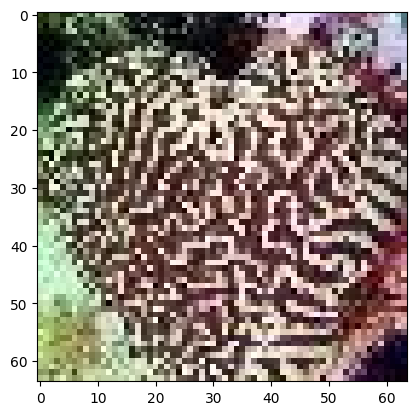

Class: ['gazelle']


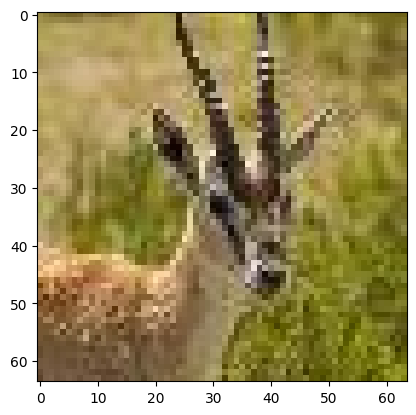

Class: ['spider web', " spider's web"]


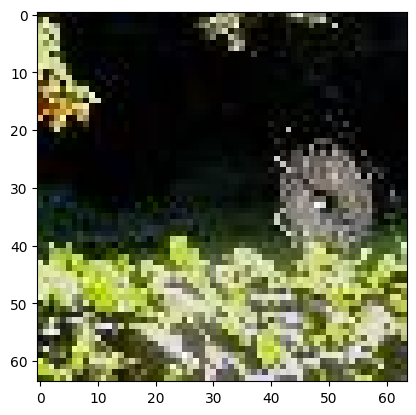

Class: ['broom']


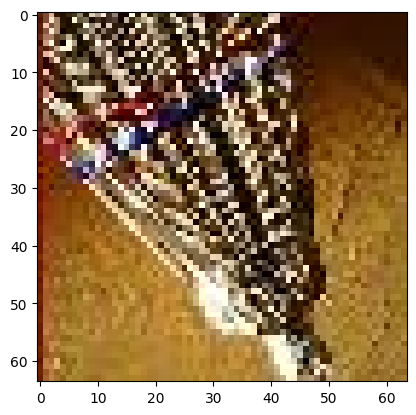

Class: ['boa constrictor', ' Constrictor constrictor']


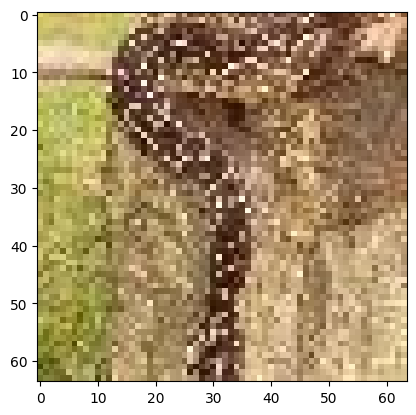

Query: car
Class: ['sports car', ' sport car']


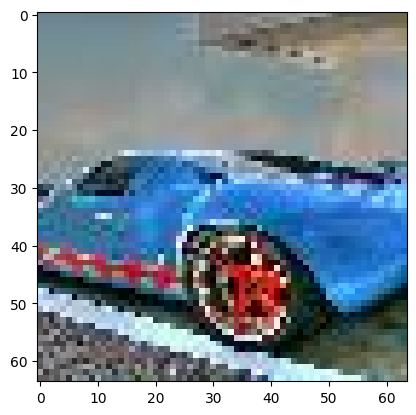

Class: ['limousine', ' limo']


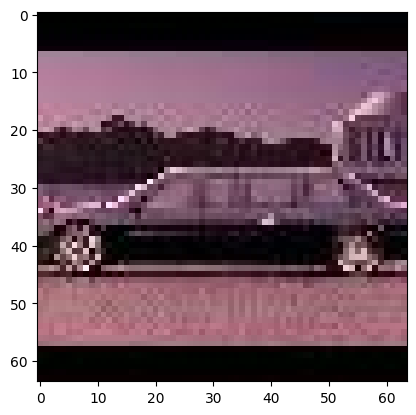

Class: ['beach wagon', ' station wagon', ' wagon', ' estate car', ' beach waggon', ' station waggon', ' waggon']


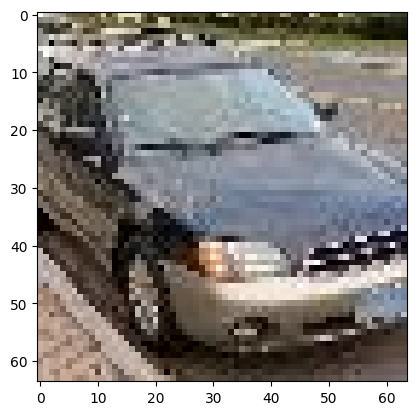

Class: ['convertible']


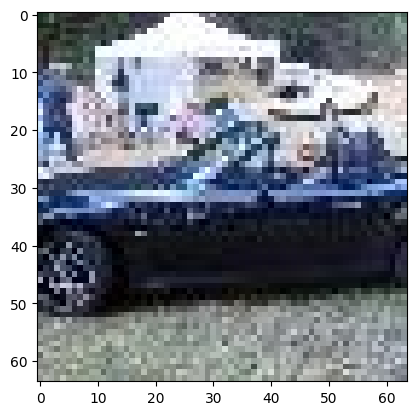

Class: ['convertible']


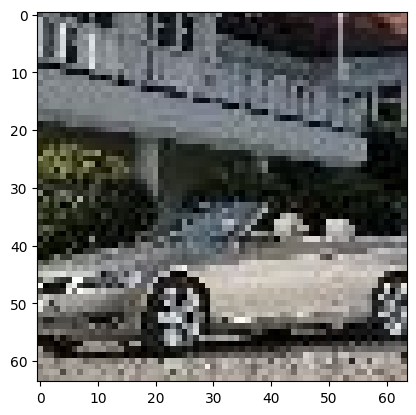

Query: flower
Class: ['poncho']


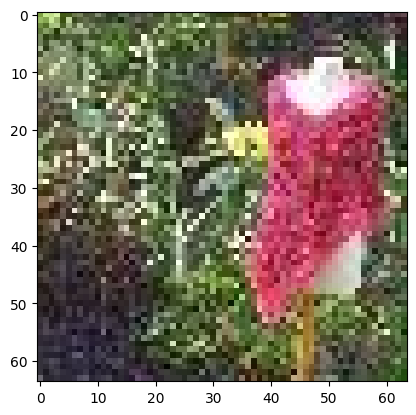

Class: ['sulphur butterfly', ' sulfur butterfly']


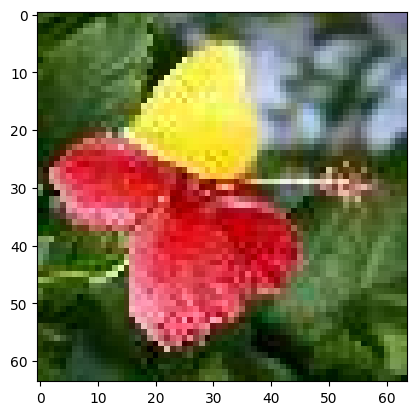

Class: ['dragonfly', ' darning needle', " devil's darning needle", ' sewing needle', ' snake feeder', ' snake doctor', ' mosquito hawk', ' skeeter hawk']


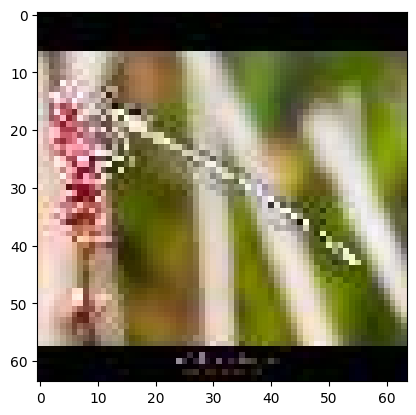

Class: ['dragonfly', ' darning needle', " devil's darning needle", ' sewing needle', ' snake feeder', ' snake doctor', ' mosquito hawk', ' skeeter hawk']


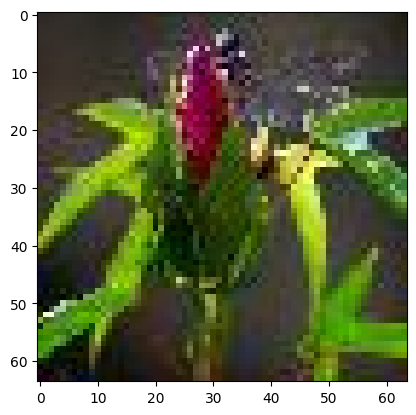

Class: ['sulphur butterfly', ' sulfur butterfly']


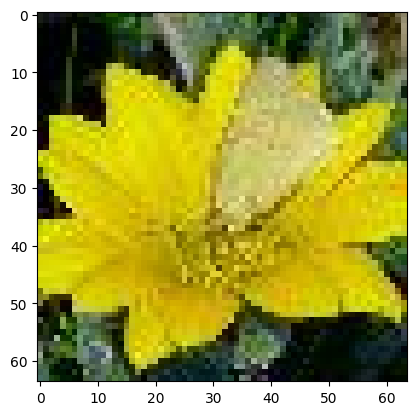

Query: building
Class: ['barn']


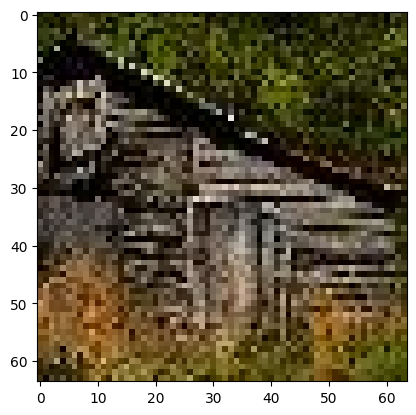

Class: ['bannister', ' banister', ' balustrade', ' balusters', ' handrail']


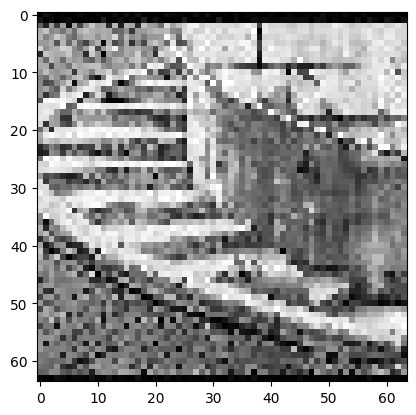

Class: ['freight car']


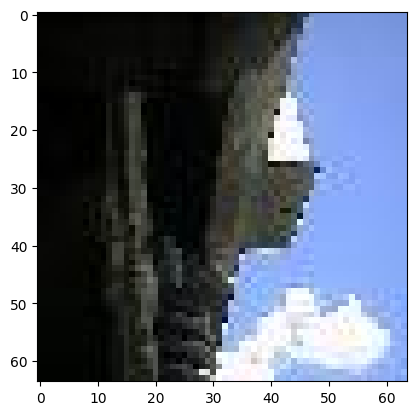

Class: ['steel arch bridge']


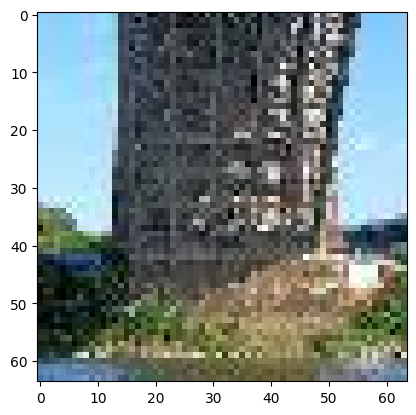

Class: ['flagpole', ' flagstaff']


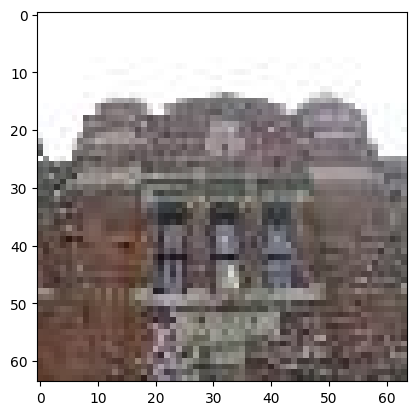

Query: tree
Class: ['acorn']


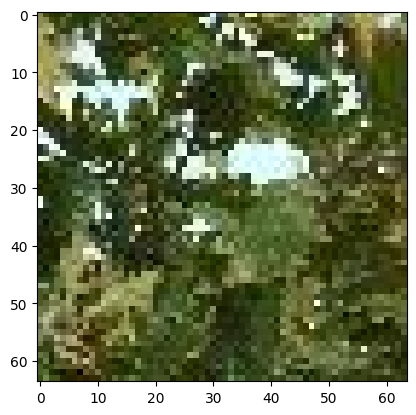

Class: ['German shepherd', ' German shepherd dog', ' German police dog', ' alsatian']


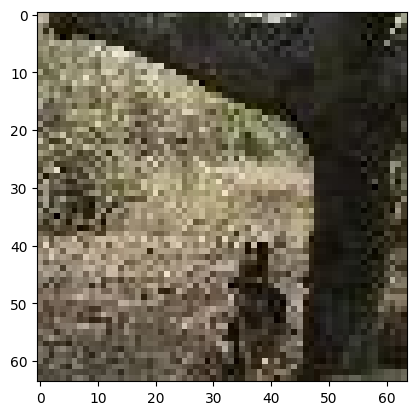

Class: ['walking stick', ' walkingstick', ' stick insect']


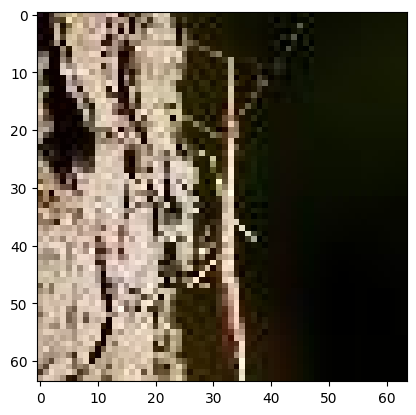

Class: ['walking stick', ' walkingstick', ' stick insect']


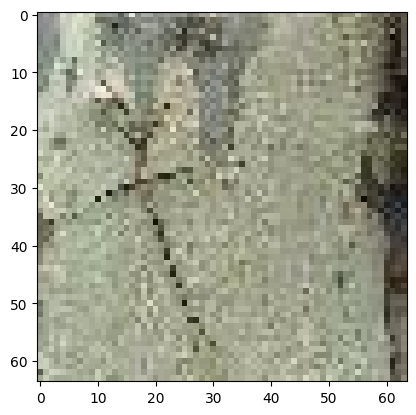

Class: ['koala', ' koala bear', ' kangaroo bear', ' native bear', ' Phascolarctos cinereus']


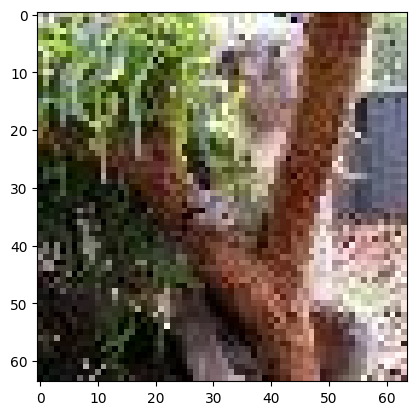

Query: bird
Class: ['king penguin', ' Aptenodytes patagonica']


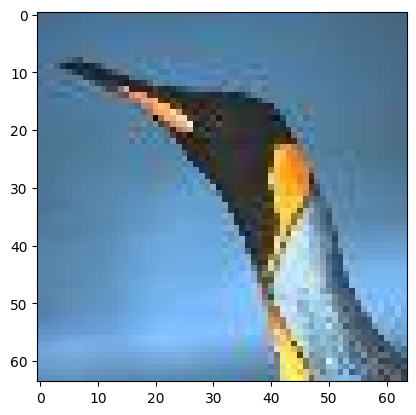

Class: ['albatross', ' mollymawk']


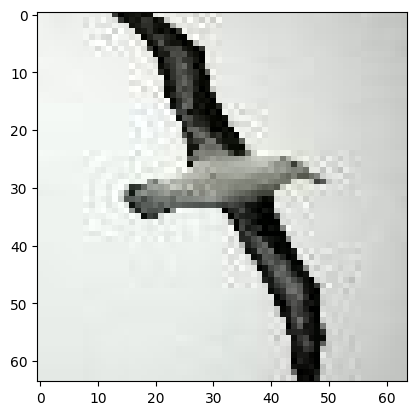

Class: ['acorn']


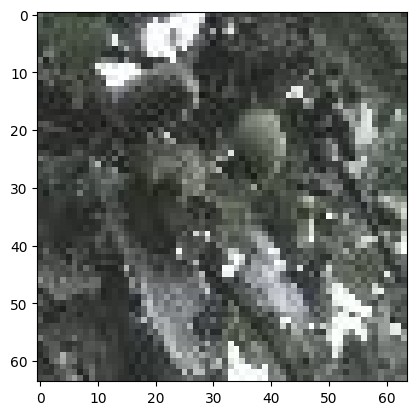

Class: ['albatross', ' mollymawk']


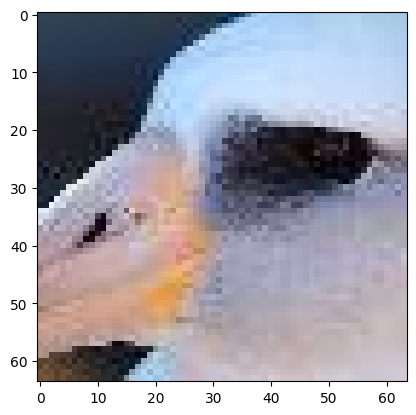

Class: ['albatross', ' mollymawk']


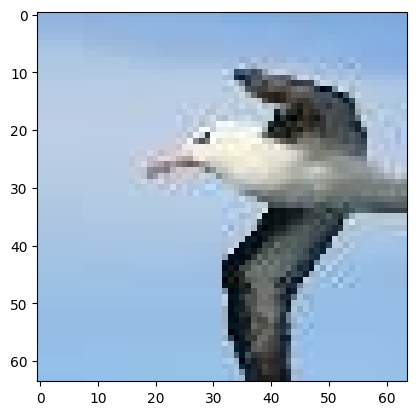

Query: bicycle
Class: ['jinrikisha', ' ricksha', ' rickshaw']


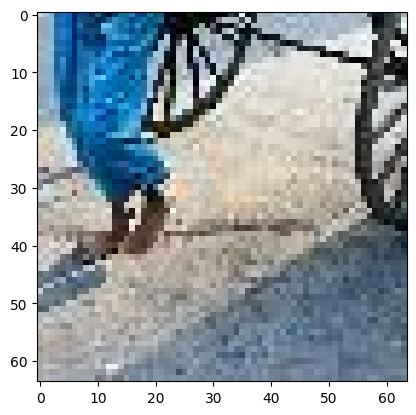

Class: ['jinrikisha', ' ricksha', ' rickshaw']


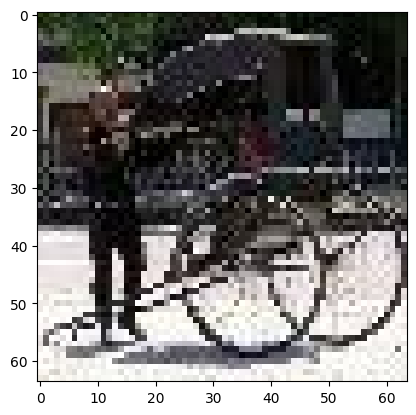

Class: ['jinrikisha', ' ricksha', ' rickshaw']


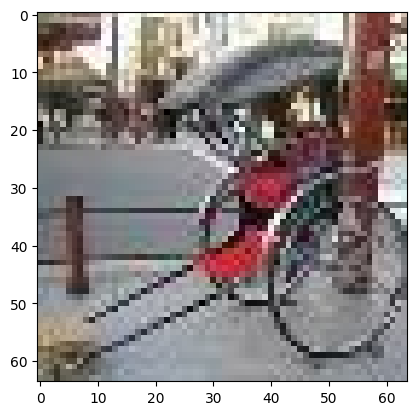

Class: ['cannon']


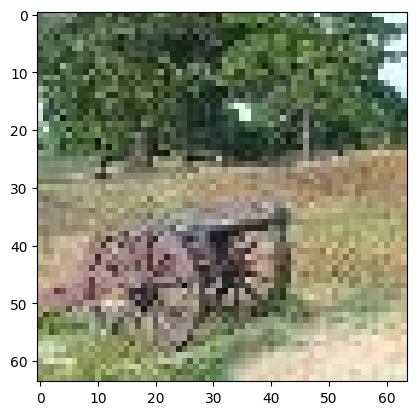

Class: ['jinrikisha', ' ricksha', ' rickshaw']


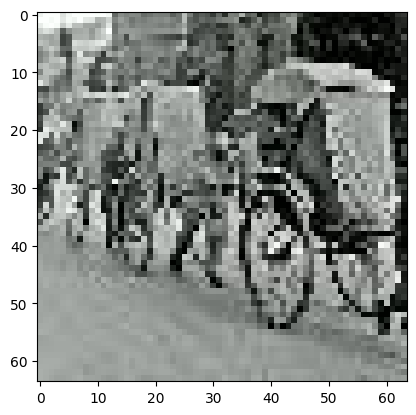

Error with the request: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/6/6f/Golden_Retriever_medium-to-light-coat.jpg
Skipping query for URL: https://upload.wikimedia.org/wikipedia/commons/6/6f/Golden_Retriever_medium-to-light-coat.jpg
Query: Image from https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg
Class: ['tabby', ' tabby cat']


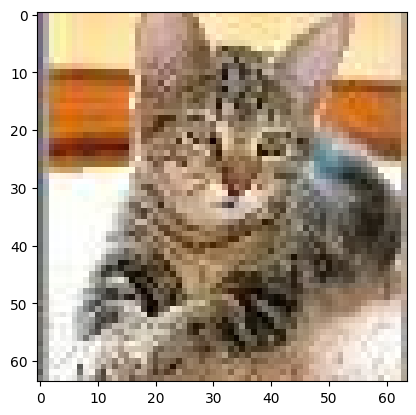

Class: ['Egyptian cat']


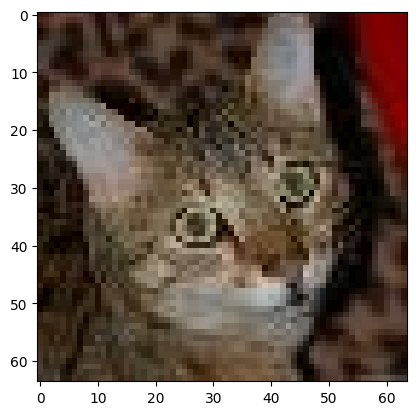

Class: ['Egyptian cat']


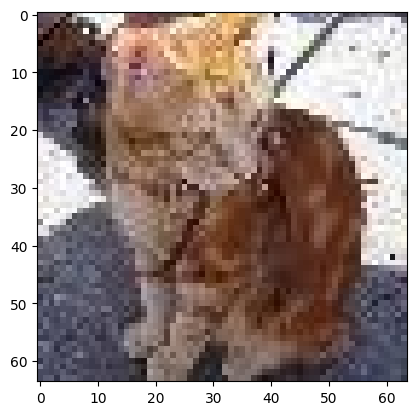

Class: ['tabby', ' tabby cat']


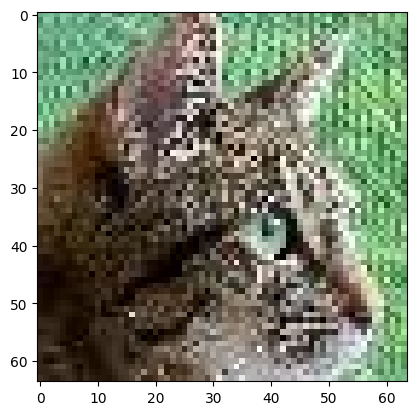

Class: ['tabby', ' tabby cat']


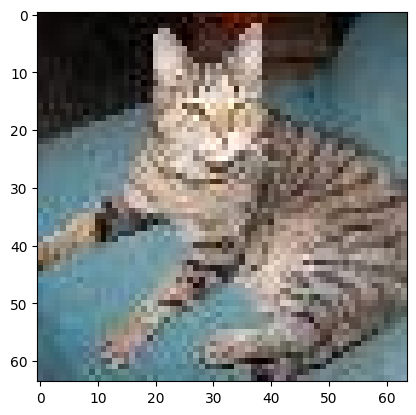

Error with the request: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/3/33/Boeing_777-300ER_on_final_approach_at_Heathrow_Airport.jpg
Skipping query for URL: https://upload.wikimedia.org/wikipedia/commons/3/33/Boeing_777-300ER_on_final_approach_at_Heathrow_Airport.jpg
Error with the request: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/3/3f/Zebra_in_Tanzania.jpg
Skipping query for URL: https://upload.wikimedia.org/wikipedia/commons/3/3f/Zebra_in_Tanzania.jpg
Error with the request: 404 Client Error: Not Found for url: https://upload.wikimedia.org/wikipedia/commons/5/5a/2018_Tesla_Model_3_Midnight_Silver.jpg
Skipping query for URL: https://upload.wikimedia.org/wikipedia/commons/5/5a/2018_Tesla_Model_3_Midnight_Silver.jpg


In [37]:
import requests
from PIL import Image, UnidentifiedImageError
from io import BytesIO

# Function to load an image from a URL with a custom User-Agent
def load_image_from_url(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
    }
    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Check if the request was successful
        img = Image.open(BytesIO(response.content)).convert("RGB")
        return img
    except requests.exceptions.RequestException as e:
        print(f"Error with the request: {e}")
    except UnidentifiedImageError:
        print(f"Cannot identify image file from URL: {url}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return None  # Return None if there was an issue


# Test with custom queries and web images
queries = [
    "dog", "cat", "airplane", "zebra", "car",
    "flower", "building", "tree", "bird", "bicycle"
]

image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/6/6f/Golden_Retriever_medium-to-light-coat.jpg",  # Dog
    "https://upload.wikimedia.org/wikipedia/commons/3/3a/Cat03.jpg",  # Cat
    "https://upload.wikimedia.org/wikipedia/commons/3/33/Boeing_777-300ER_on_final_approach_at_Heathrow_Airport.jpg",  # Airplane
    "https://upload.wikimedia.org/wikipedia/commons/3/3f/Zebra_in_Tanzania.jpg",  # Zebra
    "https://upload.wikimedia.org/wikipedia/commons/5/5a/2018_Tesla_Model_3_Midnight_Silver.jpg"  # Car
]

# Perform search for text queries
for query in queries:
    print(f"Query: {query}")
    indices = search_engine(query, model, image_embeddings, dataset, preprocess)
    display_results(indices, dataset)

# Perform search for image queries
for url in image_urls:
    image = load_image_from_url(url)
    if image is not None:
        print(f"Query: Image from {url}")
        indices = search_engine(image, model, image_embeddings, dataset, preprocess)
        display_results(indices, dataset)
    else:
        print(f"Skipping query for URL: {url}")


Wonderful!

Regarding the model’s overall performance, we see that the zero-shot classification accuracy on the Tiny-ImageNet dataset is a remarkable 90.50%. This high accuracy indicates that the model is highly effective at classifying images based on textual descriptions, even when it hasn’t been trained specifically on this dataset. While the results from the text queries show that the model generally performs well, there are occasional instances where it returns less relevant results. These instances highlight some of the challenges associated with zero-shot learning, especially when dealing with diverse and nuanced image classes.

# Future Implication:

There are several ways we can enhance this project to improve its functionality, performance, and user experience. One significant improvement would be to integrate Facebook’s AI Similarity Search (FAISS) library for faster search. Currently, the search engine uses cosine similarity to find the most similar images, which can be computationally expensive, especially with large datasets. FAISS is optimized for fast nearest neighbor search and can efficiently handle large-scale datasets, significantly speeding up the search process and making the system more scalable. Another area for improvement is image preprocessing and augmentation. At the moment, the preprocessing steps are fairly basic, mainly focusing on resizing and normalizing the images. By incorporating more sophisticated data augmentation techniques such as random cropping, rotation, and color jittering, we could make the model more robust. Additionally, experimenting with different preprocessing pipelines might yield better embeddings, further enhancing the model's performance.

Expanding the dataset is another critical enhancement. The current model is limited to the Tiny-ImageNet dataset, which is a small subset of the larger ImageNet dataset. Expanding the dataset to include the full ImageNet or other datasets with a wide variety of classes and images would allow the model to learn from more diverse data, potentially improving its zero-shot learning capabilities and overall accuracy. Fine-tuning the CLIP model on specific domains could also lead to better results. While the CLIP model is powerful, it is currently used in its pre-trained form, which is general-purpose and not optimized for any specific domain. Fine-tuning the model on the Tiny-ImageNet dataset or a domain-specific dataset, such as medical or satellite images, could improve its performance in specific applications, helping the model better understand the nuances of the domain it’s applied to.

Enhancing the user interface is another area where significant improvements can be made. The homework currently lacks a user-friendly interface and relies on code to input queries and display results. Developing a web-based interface or an interactive dashboard using frameworks like Flask, Django, or Streamlit would make the system more accessible. This would allow users to input text or upload images directly through the interface and view the search results in a more intuitive and visually appealing way. Additionally, we could add support for multimodal queries. The current search engine supports either text or image queries, but not both simultaneously. Enabling support for multimodal queries, where users can provide both a text description and an image, could lead to more accurate and relevant search results by leveraging the strengths of both input types.

Implementing a feedback loop is another potential enhancement. Currently, the search engine doesn’t learn from user interactions. By allowing users to rate the relevance of the search results, we could gather feedback that could be used to fine-tune the embeddings or adjust the search algorithm dynamically, making the search engine smarter and more responsive over time. Exploring other similarity metrics is another avenue for improvement. The project currently relies solely on cosine similarity for comparing embeddings. However, experimenting with other similarity metrics or training a small model to learn a custom similarity metric could improve performance in specific contexts, offering more flexibility and potentially better results.

We could also consider deploying the model for public use. Right now, the project is likely running in a local environment, which limits its accessibility. Deploying the model on a cloud platform like AWS, Google Cloud, or Azure would make it accessible to a broader audience. This could also involve setting up APIs that allow other developers to integrate the search engine into their applications, expanding its utility and reach. Finally, refining error handling and improving the system’s robustness would enhance reliability. While there is some error handling in place, particularly with image URL retrievals, this could be expanded to cover more edge cases, such as malformed queries, unsupported file types, or network issues. Making the system more robust to noisy or ambiguous inputs would improve its overall reliability, ensuring a smoother user experience.

By implementing these improvements, we can make the homework a bigger project and also faster, more accurate, more user-friendly, and more scalable, ultimately enhancing its overall effectiveness and usability.